# Week 12 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [184]:
import pandas as pd
import os
notebook_path = os.path.abspath("week12_assignment_2.ipynb")
WHO = os.path.join(os.path.dirname(notebook_path), "xmart.csv")
life_exp = pd.read_csv(WHO)
print(life_exp)
rows = life_exp.shape[0]
columns = len(life_exp.columns)

               Unnamed: 0 Unnamed: 1 Life expectancy at birth (years)  \
0              WHO region       Year                           Female   
1                  Global       2019                             75.9   
2                  Global       2015                             74.9   
3                  Global       2010                             73.2   
4                  Global       2000                             69.3   
5                  Africa       2019                             66.6   
6                  Africa       2015                             64.7   
7                  Africa       2010                             61.3   
8                  Africa       2000                             54.3   
9                Americas       2019                             79.8   
10               Americas       2015                             79.5   
11               Americas       2010                             78.4   
12               Americas       2000               

Note 1: There are 29 total rows of data and a total of 4 columns in the dataset.

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)? If your data has a unique identifier (e. g. a person or visit or record ID) then find the column with the next most number of unique values.

In [132]:
len(life_exp)-1

28

Note 2: Since the data is presented with multiple columns of data based on both WHO region and year. As a result, there are multiple unique sets of data for life expectancy of women. The two sets of data given for these categories are for "at birth" and "at age 60". The header column doesn't have any data, so we must subtract that from the length of the data, giving us the total amount of unique data points of 28.

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [133]:
birth = life_exp['Life expectancy at birth (years)'].unique()
age_60 = life_exp['Life expectancy at age 60 (years)'].unique()
len(birth)
len(age_60)

27

Note 3: The amount of unique data entries is one number less than the amount of total unique rows of data. Therefore, this means 1 row of information in this dataset may have redundancies.

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

               Unnamed: 0 Unnamed: 1 Life expectancy at birth (years)  \
1                  Global       2019                             75.9   
2                  Global       2015                             74.9   
3                  Global       2010                             73.2   
4                  Global       2000                             69.3   
5                  Africa       2019                             66.6   
6                  Africa       2015                             64.7   
7                  Africa       2010                             61.3   
8                  Africa       2000                             54.3   
9                Americas       2019                             79.8   
10               Americas       2015                             79.5   
11               Americas       2010                             78.4   
12               Americas       2000                             77.1   
13        South-East Asia       2019               

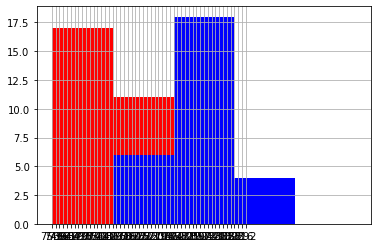

In [227]:
life_exp2 = pd.read_csv(WHO)
#life_exp2.apply(pd.to_numeric, errors='ignore')
life_exp2 = life_exp2.drop(life_exp.index[0:1])
print(life_exp2)
#life_exp2 = life_exp2.astype(float)
#life_exp2.groupby('Unnamed: 0')['Life expectancy at birth (years)'].mean().plot(kind='bar')
birth = life_exp2['Life expectancy at birth (years)'].hist(bins=5, range=[0,80], color='red')
age_60 = life_exp2['Life expectancy at age 60 (years)'].hist(bins=5, range=[0,80], color='blue')
print(birth)
print(age_60)

Note 4: These histogram displays the prevalence of each life expectancy for different regions across the world in varying years. There are two histograms, one for the projection for women at birth (in red) and one at age 60 (in blue).

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [ ]:
#groups = dict(list(grouped))
#print(groups)
#keys = groups.keys()
#values = groups.values()

#for key, value in groups.items():
#    print(key, value['Life expectancy at birth (years)'].astype(float).mean())

#plt.bar(keys, values['Life expectancy at birth (years)'].astype(float).mean())

{'Africa': 61.72500000000001, 'Americas': 78.7, 'Eastern Mediterranean': 69.35, 'Europe': 79.375, 'Global': 73.325, 'South-East Asia': 69.875, 'Western Pacific': 78.775}


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

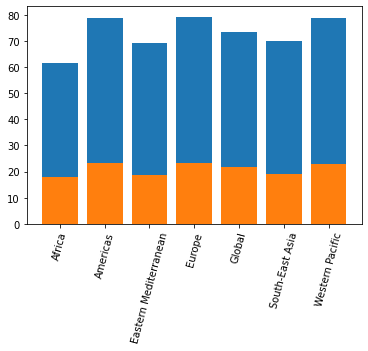

In [333]:
import matplotlib.pyplot as plt
grouped = life_exp2.groupby('Unnamed: 0')
print(grouped['Life expectancy at birth (years)']) #.agg(['mean'])
life = {}
life_60 = []
for key, item in grouped:
    #print(grouped.get_group(key)['Life expectancy at birth (years)'].astype(float).mean())
    life[key] = grouped.get_group(key)['Life expectancy at birth (years)'].astype(float).mean()
    life_60.append(grouped.get_group(key)['Life expectancy at age 60 (years)'].astype(float).mean())
print(life)
names = list(life.keys())
values = list(life.values())
plt.bar(range(len(life)),values,tick_label=names)
plt.bar(range(len(life)),life_60,tick_label=names)
plt.xticks(rotation = 75)

Note 5: The additional exploration I took the mean of the life expectancy over the years, grouped by WHO regions. I then coupled the data for life expectancy at birth (blue) with the life expectancy at age 60 (orange). Thus, we are able to see the mean life expectancy for women across the different regions, taken at both birth and age 60. I ran into many issues trying to group them by the WHO regions, as well correcting the data types to allow for the creation of the histogram and therefore required the additional time.

---

## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  The first line of code below will **pull** down my comments into your local folders.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Save this note with Ctrl-S (or Cmd-S)
2. Skip down to the last command cell (the one starting with `%%bash`) and run that cell.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [ ]:
assert False, "DO NOT REMOVE THIS LINE"

---

In [334]:
%%bash
git pull
git add week12_assignment_2.ipynb
git commit -a -m "Submitting the week 12 assignment"
git push

Already up to date.
[main 94cc8a2] Submitting the week 12 assignment
 2 files changed, 526 insertions(+), 5 deletions(-)
 create mode 100644 week12/week12_assignment_2.ipynb


To github.com:shreyadash/hds5210-2021.git
   c822158..94cc8a2  main -> main



---

If the message above says something like _Submitting the week 10 review exercises_ or _Everything is up to date_, then your work was submitted correctly.